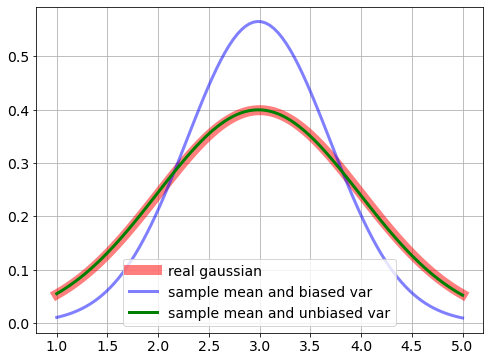

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']='14'

np.random.seed(3)
#real
x=np.linspace(1,5,num=100)

def gaussian(x,mu,sig2):
    
    return np.exp(((x-mu)**2)/(-2*sig2))/np.sqrt(2*np.pi*sig2)

mu,sig2=3,1.

#generate 10000 data sets with only two data

N=2 #number of data in each dataset
M=10000 #number of dataset
sample=np.sqrt(sig2)*np.random.randn(N,M)+mu

mu_hat=(1./N)*sample.sum(0)
#biased sample var
sig2_hat=(1./N)*((sample-mu_hat)**2).sum(0)
#unbiased sample var
sig2_hat_unbiased=(1./(N-1))*((sample-mu_hat)**2).sum(0)

plt.figure(figsize=(8,6))
#real
plt.plot(x,gaussian(x,mu,sig2),'r',linewidth=10,label='real gaussian',alpha=.5)

#estimator using sample mean and sample variance
plt.plot(x,gaussian(x,mu_hat.sum(0)/M,sig2_hat.sum(0)/M), 'b',linewidth=3,label='sample mean and biased var', alpha=0.5)
plt.plot(x,gaussian(x,mu_hat.sum(0)/M,sig2_hat_unbiased.sum(0)/M), 'g',linewidth=3,label='sample mean and unbiased var')

plt.grid()
plt.legend()
plt.savefig('un_bias_variance.png',dpi=350)

### figure 1.15

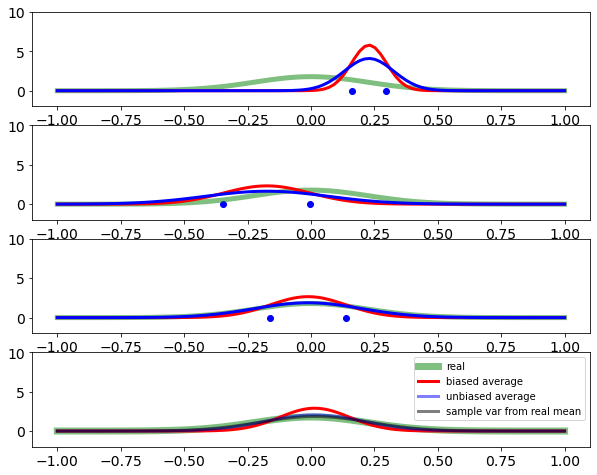

In [2]:
np.random.seed(10)

x=np.linspace(-1,1,100)
mu,sig2=0,0.05
N=2 #sample size

plt.figure(figsize=(10,8))
mu_hat_all=[]
sig2_hat_all=[]
sig2_hat_un_all=[]
sig2_real_all=[]
for i in range(3):
    plt.subplot(4,1,i+1)
    plt.ylim([-2,10])
    
    sample=np.random.randn(N)*np.sqrt(sig2)+mu
    plt.plot(sample,[0,0],'bo')
    
    mu_hat=sample.sum()/N
    sig2_hat=((sample-mu_hat)**2).sum()/N
    sig2_hat_un=((sample-mu_hat)**2).sum()/(N-1)
    sig2_real=((sample-mu)**2).sum()/N
    mu_hat_all.append(mu_hat)
    sig2_hat_all.append(sig2_hat)
    sig2_hat_un_all.append(sig2_hat_un)
    sig2_real_all.append(sig2_real)
    
    plt.plot(x,gaussian(x,mu,sig2),'g',linewidth=5,label='real',alpha=0.5)
    plt.plot(x,gaussian(x,mu_hat,sig2_hat),'r',linewidth=3,label='sample mean and var')
    plt.plot(x,gaussian(x,mu_hat,sig2_hat_un),'b',linewidth=3,label='sample mean and var')
    
plt.subplot(4,1,4)
plt.ylim([-2,10])
plt.plot(x,gaussian(x,mu,sig2),'g',linewidth=7,label='real',alpha=0.5)
plt.plot(x,gaussian(x,sum(mu_hat_all)/3,sum(sig2_hat_all)/3),'r',linewidth=3,label='biased average')
plt.plot(x,gaussian(x,sum(mu_hat_all)/3,sum(sig2_hat_un_all)/3),'b',linewidth=3,label='unbiased average',alpha=0.5)
plt.plot(x,gaussian(x,sum(mu_hat_all)/3,sum(sig2_real_all)/3),'k',linewidth=3,label='sample var from real mean',alpha=0.5)

plt.legend(fontsize=10)
plt.savefig('3_bias_variance.png',dpi=350)

### figure 3.5, 3.6

generate 100 datasets with N=25 data

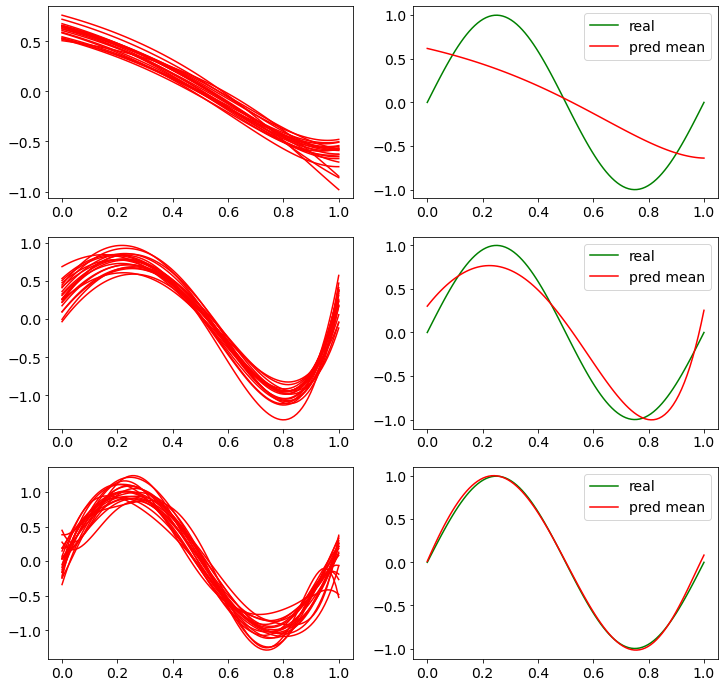

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

np.random.seed(5)

lmd_smooth=[1,0.1,0.01,0.005,0.001,0.0001,0.000001,0.0000001,0.000000001]
label=[0,3,8]
lmd_all=[lmd_smooth[i] for i in label]
#test/real
x=np.linspace(0,1,100)
y=np.sin(2*np.pi*x)
plt.figure(figsize=(12,12))

for n,lmd in enumerate(lmd_all):
    f_pred_all=[]
    for i in range(20):
        #training data
        x_25=np.linspace(0,1,25) #sample size=25
        y_25=np.sin(2*np.pi*x_25)+np.random.normal(scale=0.25,size=x_25.shape)

        #polytransformed
        f=PolynomialFeatures(degree=6).fit_transform(x.reshape(-1,1))
        f_25=PolynomialFeatures(degree=6).fit_transform(x_25.reshape(-1,1))

        ridge=Ridge(lmd)
        ridge.fit(f_25,y_25)

        f_pred=ridge.predict(f)
        f_pred_all.append(f_pred)
        plt.subplot(3,2,2*n+1)
        plt.plot(x,f_pred,'r',label='pred')


    plt.subplot(3,2,2*n+2)
    plt.plot(x,y,'g',label='real')
    plt.plot(x,np.array(f_pred_all).mean(0),'r',label='pred mean')
    plt.legend()
    
plt.savefig('ridge_bias_variance.png',dpi=350)

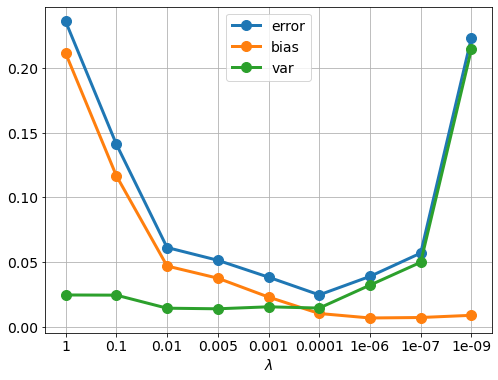

In [28]:
from mlxtend.evaluate import bias_variance_decomp
lmd_smooth=[1,0.1,0.01,0.005,0.001,0.0001,0.000001,0.0000001,0.000000001]

#lmd_smooth=np.linspace(1,0.00000001,num=20)

err_all,bias_all,var_all=[],[],[]
for lmd in lmd_smooth:
    error, bias, var = bias_variance_decomp(Ridge(lmd), f_25, y_25,f,y,loss='mse',random_seed=5)
    err_all.append(error)
    bias_all.append(bias)
    var_all.append(var)
    
plt.figure(figsize=(8,6))
plt.plot(err_all,'-o',markersize=10,linewidth=3,label='error')
plt.plot(bias_all,'-o',markersize=10,linewidth=3,label='bias')
plt.plot(var_all,'-o',markersize=10,linewidth=3,label='var')
#plt.plot(np.array(var_all)+np.array(bias_all),label='var+bias')

plt.legend()
plt.grid()
plt.xlabel('$\lambda$')
plt.xticks(np.arange(9),[str(lmd) for lmd in lmd_smooth])

plt.savefig('decomp_bias_variance.png',dpi=350)